## NLP with TextBlob Library
##### By Ruben Seoane

_Using TextBlob as an introduction to NLP for beginners. Based on the following tutorial:https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/_ All credit goes to Analythics Vidya and their awesome team.


### Table of Contents
1. **Setting up the System**
2. **Having a go at NLP tasks using TextBlob**
    1. Tokenization
    2. Noun phrase extraction
    3. POS-Tagging
    4. Words inflection and lemmatization
    5. N-grams
    6. Sentiment Analysis
3. **Other cool things to do with TextBlob**
    1. Spelling correction
    2. Creating a short summary of a text
    3. Translation and language detection
4. **Text classification using TextBlob**
5. **Pros and Cons**

### 1. Setting up the system

Let's install the library by opening the system prompt or terminal and obtain the corpora (practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora).

In [42]:
pip install -U textblob
python -m textblob.download_corpora

SyntaxError: invalid syntax (<ipython-input-42-672d51ce94c2>, line 1)

### 2. NLP tasks using TextBlob

#### 2.1 Tokenization

Tokenization refers to dividing text or a sentence into a sequence of tokens, which approximately corresponds to “words”. It's one of the basic tasks of NLP. Let's:

1. Create a textblob object and pass a string with it.
2. Call functions of textblob in order to do a specific task.

In [43]:
from textblob import TextBlob

blob = TextBlob("Analytics Vidhya is a great platform to learn data science. \n It helps community through blogs, hackathons, discussions,etc.")

# This textblob object  can be tokenized into a sentence and further into words:

blob.sentences

[Sentence("Analytics Vidhya is a great platform to learn data science."),
 Sentence("It helps community through blogs, hackathons, discussions,etc.")]

In [44]:
blob.sentences[0] # Extracting the 1st sentence

Sentence("Analytics Vidhya is a great platform to learn data science.")

In [45]:
for words in blob.sentences[0]: # Extract words of first sentence
    print(words)

A
n
a
l
y
t
i
c
s
 
V
i
d
h
y
a
 
i
s
 
a
 
g
r
e
a
t
 
p
l
a
t
f
o
r
m
 
t
o
 
l
e
a
r
n
 
d
a
t
a
 
s
c
i
e
n
c
e
.


#### 2.2 Noun Phrase Extraction

After extracting the words inthe previous step, we can focus on extraction nouns, which is an important step in order to obtain the "who" of a sentence, the main entity.

In [46]:
blob = TextBlob("Analytics Vidhya is a great platform to learn data science.")
for np in blob.noun_phrases:
    print(np)

analytics vidhya
great platform
data science


#### 2.3 Part of Speech Tagging
POS or grammatical tagging is a method that finds, based on context, whether a word is a noun, and adjective, a verb, pronoun...
It continues the process of noun phrase extraction, but finding all parts of the speech within a sentence.

In [47]:
for words, tag in blob.tags:
    print(words, tag)

Analytics NNS
Vidhya NNP
is VBZ
a DT
great JJ
platform NN
to TO
learn VB
data NNS
science NN


NN being Noun, DT= Determiner, VB= verb, for a full list go here: https://www.clips.uantwerpen.be/pages/mbsp-tags

#### 2.4 Words Inflection and Lemmatization
Inflection is a process of word formation by which characters are added to the base form of a word to express grammatical meanings. 
Lemmatization is the process of transforming a word into its root, or the simplest meaningful form.

In [48]:
# Inflection
blob = TextBlob("Analytics Vidhya is a great platform to learn data science. \n It helps community through blogs, hackathons, discussions,etc.")
print (blob.sentences[1].words[1])
print (blob.sentences[1].words[1].singularize())


helps
help


The Texblob library also offers a built-in object known as _Word_. We create a _word_ object and then apply the function as shown:

In [49]:
from textblob import Word
w = Word('Platform')
w.pluralize()

'Platforms'

We can use the tags shown in part 3.3 to inflect a specific set of words:

In [50]:
## Using tags
for words, pos in blob.tags:
    if pos == "NN":
        print(words.pluralize())
        

platforms
sciences
communities


For **Lemmatization** we use the _lemmatize_ function:

In [51]:
w = Word('running')
w.lemmatize('v') ## v representing Verb

'run'

#### 2.5 N-grams
An N-Gram is a combination of multiple words together. An N-Gram where N>1 is usually more informative compared to single words in the process of language modelling. They can be easily accessed in Texblob by using the **_ngram_** function, which returns a tuple of n successive words.

In [52]:
for ngram in blob.ngrams(2):
    print(ngram)

['Analytics', 'Vidhya']
['Vidhya', 'is']
['is', 'a']
['a', 'great']
['great', 'platform']
['platform', 'to']
['to', 'learn']
['learn', 'data']
['data', 'science']
['science', 'It']
['It', 'helps']
['helps', 'community']
['community', 'through']
['through', 'blogs']
['blogs', 'hackathons']
['hackathons', 'discussions']
['discussions', 'etc']


#### 2.6 Sentyment Analysis
SA is the process of determining the sentiment and attitude of the writer, categorised as positive, neutral and negative.

The _sentiment_ function of Texblob returns two properties, **polarity** and **subjectit**.

- **Polarity** is shown as a floating number in the range [-1,1], where -1 expresses a negative statement and 1 a positive one.
- **Subjectivity** is a float in the [0,1], expressing if a statement reflects a personal opinion, a degree of emotion or judgement, against a factual objective sentence.

In [53]:
print(blob)
blob.sentiment

Analytics Vidhya is a great platform to learn data science. 
 It helps community through blogs, hackathons, discussions,etc.


Sentiment(polarity=0.8, subjectivity=0.75)

### 3. More Applications of Texblob

#### 3.1 Spelling Correction
This feature can be accesse through the **_correct_** function, shown here:

In [54]:
blob = TextBlob('Analytics Vidhya is a gret platfrm to learn data scence')
blob.correct()

TextBlob("Analytics Vidhya is a great platform to learn data science")

We can also access the list of suggestion and its confidence through the **_spellcheck_** function:

In [55]:
blob.words[4].spellcheck()

[('great', 0.5351351351351351),
 ('get', 0.3162162162162162),
 ('grew', 0.11216216216216217),
 ('grey', 0.026351351351351353),
 ('greet', 0.006081081081081081),
 ('fret', 0.002702702702702703),
 ('grit', 0.0006756756756756757),
 ('cret', 0.0006756756756756757)]

#### 3.2 Creating a short summary of a text
Using the previous function, we can generatea simple function to give the reader an idea about the text:

In [56]:
import random

blob = TextBlob('Analytics Vidhya is a thriving community for data driven industry. This platform allows \
people to know more about analytics from its articles, Q&A forum, and learning paths. Also, we help \
professionals & amateurs to sharpen their skillsets by providing a platform to participate in Hackathons.')

nouns = list()
for word, tag in blob.tags:
    if tag == "NN":
        nouns.append(word.lemmatize())
        
print('This text is about...')
for item in random.sample(nouns,5):
    word = Word(item)
    print(word.pluralize())
    

This text is about...
platforms
industries
platforms
forums
communities


#### 3.3 Translation and Language Detection
This:

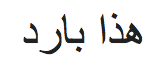

In [57]:
from IPython.display import Image
Image("https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/02/Screen-Shot-2018-02-11-at-4.58.28-PM.png")

In [58]:
## Lets detect the language

blob2 = TextBlob("هذا بارد")
blob2.detect_language()

'ar'

It's Arabic, so let's translate it into English, with the, wait for it, **_translate_** function:

In [59]:
blob2.translate(from_lang="ar" ,to = "en")

TextBlob("that's cool")

TextBlob can automatically detect the source language even if you haven't defined it:

In [60]:
blob2.translate(to = "en")

TextBlob("that's cool")

### 4 Text Classification 

Let's build a simple test classification model, we'll need to prepare training  and testing data.

In [61]:
training = [
('Tom Holland is a terrible spiderman.','pos'),
('a terrible Javert (Russell Crowe) ruined Les Miserables for me...','pos'),
('The Dark Knight Rises is the greatest superhero movie ever!','neg'),
('Fantastic Four should have never been made.','pos'),
('Wes Anderson is my favorite director!','neg'),
('Captain America 2 is pretty awesome.','neg'),
('Let\s pretend "Batman and Robin" never happened..','pos'),
]
testing = [
('Superman was never an interesting character.','pos'),
('Fantastic Mr Fox is an awesome film!','neg'),
('Dragonball Evolution is simply terrible!!','pos')
]

TextBlob provides with an in-built classifiers module to create custom classifiers. Let's create a basic one:

In [62]:
from textblob import classifiers
classifier = classifiers.NaiveBayesClassifier(training)

We have use a Naive Bayes Classifier but TextBlob offers Decision Trees as well:

In [63]:
dt_classifier = classifiers.DecisionTreeClassifier(training)

Let's check the accuracy of the classifiers, TextBlob shows the most relevant features as well:

In [64]:
print(classifier.accuracy(testing))
classifier.show_informative_features(3)

1.0
Most Informative Features
            contains(is) = True              neg : pos    =      2.9 : 1.0
             contains(a) = False             neg : pos    =      1.8 : 1.0
         contains(never) = False             neg : pos    =      1.8 : 1.0


Let's test it on a random text to see it in action:


In [65]:
blob = TextBlob('the weather is terrible!', classifier=classifier)
print(blob.classify())

neg


Given the training set, the classifier has returned the correct result, but in a regular NLP project, a bigger dataset, plus performing preprocessing and data cleaning will be necessary.

### 5. Pros and Cons of TextBlob

#### Pros:
- It's built on top of NLTK and Pattern, making it simple for beginners by providing an intuitive interface to NLTK.
- It provides language translation and detection powered by Google Translate ( not provided with Spacy).

#### Cons:
- Slower in the comparison to spacy but faster than NLTK. (Spacy > TextBlob > NLTK)
- Doesn't provide features like dependency parsing, word vectors etc. which is provided by spacy.